In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import copy
import scipy

import sys
sys.path.append('../data')
sys.path.append('../Librerias')

import dataset as ds
import utils
import caract as dc


In [2]:
fpath = "/Users/granosftp/Documents/GitHub/Tesis/data/"
#fpath = "/Users/consu/OneDrive/Documentos/GitHub/Tesis/data/"
fname = "data2_file1_030124.mat"


cutoff = [8/1000, 11/1000]

set =  ds.MatFileToDataFrame(fpath, fname)
df = set.get_dataframe(cutoff)
df.tail()

KeyError: 'data'

In [5]:
mat_data = scipy.io.loadmat(fpath+fname)
signal = pd.DataFrame(mat_data)
signal

ValueError: Per-column arrays must each be 1-dimensional

In [ ]:
defects = dc.CaractDefect(df)


In [ ]:
defects.get_hilbert()[0]

,Hilbert Transform,Amplitude,Instantaneous Phase,Gradient Phase
0,-0.071002-0.004745j,0.071160,-3.074865,-0.059617
1,-0.060395-0.067391j,0.090494,-2.301505,-0.032723
2,-0.049986-0.073204j,0.088642,-2.169909,-0.007483
3,-0.039782-0.095259j,0.103232,-1.966397,0.014630
4,-0.029789-0.098247j,0.102663,-1.865189,0.032492
...,...,...,...,...
599995,0.008744-0.033806j,0.034918,35655.758924,0.564292
599996,0.008370-0.038726j,0.039621,35655.718672,0.916939
599997,0.007971-0.026995j,0.028148,35655.792953,1.313134
599998,0.007550-0.033919j,0.034749,35655.724856,1.739100


In [ ]:

len(defects.get_peaks())

16845

In [ ]:
defects.get_minAmp()

,Min Amp
0,25027
1,25028
2,27472
3,27473
4,35643
...,...
114,474553
115,474554
116,502386
117,564212


In [ ]:
min = defects.get_minAmp()['Min Amp'].values
peaks = defects.get_peaks()['Peaks'].values
intersection = np.intersect1d(min, peaks)
intersection


array([ 25028,  27473,  35644,  37221,  48357,  57435,  61736,  79002,
        82320,  84358,  97860,  99898, 101097, 131898, 165605, 166248,
       183095, 187691, 203516, 219496, 235523, 275618, 277922, 301738,
       322055, 322436, 339151, 393920, 395410, 396731, 412955, 413372,
       430275, 444419, 453976, 456080, 456878, 457201, 457404, 470769,
       474554, 502386, 564213])

In [ ]:
display(defects.get_defectos()[1][0])



,Original Signal,Signal - Mean,Filtered Signal,Hilbert Transform,Amplitude,Instantaneous Phase,Gradient Phase
24528,6.560437,0.505777,0.005911,0.005911+0.001880j,0.006203,1527.122019,-0.002188
24529,6.542023,0.487363,0.005803,0.005803+0.002217j,0.006212,1527.178990,-0.002300
24530,6.474617,0.419957,0.005676,0.005676+0.002549j,0.006222,1527.236175,-0.002410
24531,6.455875,0.401215,0.005529,0.005529+0.002871j,0.006230,1527.292939,-0.002516
24532,6.417404,0.362744,0.005363,0.005363+0.003185j,0.006238,1527.349906,-0.002619
...,...,...,...,...,...,...,...
25523,5.241249,-0.813410,-0.007098,-0.007098-0.001215j,0.007201,1574.107426,-0.002672
25524,5.226782,-0.827878,-0.006989,-0.006989-0.001609j,0.007172,1574.164232,-0.002488
25525,5.258348,-0.796312,-0.006857,-0.006857-0.001998j,0.007142,1574.221508,-0.002299
25526,5.265910,-0.788750,-0.006702,-0.006702-0.002377j,0.007111,1574.278701,-0.002104


In [ ]:
defects.get_defectos()[1]

[       Original Signal  Signal - Mean  Filtered Signal   Hilbert Transform  \
 24528         6.560437       0.505777         0.005911  0.005911+0.001880j   
 24529         6.542023       0.487363         0.005803  0.005803+0.002217j   
 24530         6.474617       0.419957         0.005676  0.005676+0.002549j   
 24531         6.455875       0.401215         0.005529  0.005529+0.002871j   
 24532         6.417404       0.362744         0.005363  0.005363+0.003185j   
 ...                ...            ...              ...                 ...   
 25523         5.241249      -0.813410        -0.007098 -0.007098-0.001215j   
 25524         5.226782      -0.827878        -0.006989 -0.006989-0.001609j   
 25525         5.258348      -0.796312        -0.006857 -0.006857-0.001998j   
 25526         5.265910      -0.788750        -0.006702 -0.006702-0.002377j   
 25527         5.279063      -0.775597        -0.006525 -0.006525-0.002747j   
 
        Amplitude  Instantaneous Phase  Gradient P

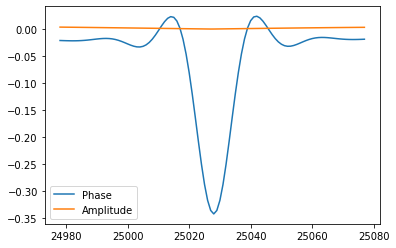

In [ ]:
x = defects.get_defectos()[1][0]

plt.plot(x['Gradient Phase'][450:550], label = 'Phase')
plt.plot(x['Amplitude'][450:550], label = 'Amplitude')
plt.legend()
plt.show()

In [ ]:
hilbert = defects.get_hilbert()[0]
x, _ = defects.get_defectos()
interval =  15

In [ ]:
def get_indices_min(serie, indice, intervalo):
    min1 = np.argmin(np.abs(serie[indice-intervalo: indice]))
    min2 = np.argmin(np.abs(serie[indice: indice+intervalo]))
    return min1+indice-intervalo, min2+indice


In [ ]:
min1,min2 = get_indices_min(hilbert['Gradient Phase'], x[0], interval)
print(min1,min2)

25017 25039


In [ ]:
def get_minimuns(serie, x, interval):
    min1 = []
    min2 = []
    for elem in x:
        aux1, aux2 = get_indices_min(serie, elem, interval)
        min1.append(aux1)
        min2.append(aux2)

    minimuns = pd.DataFrame({'start': min1, 'end': min2})
    return minimuns


In [ ]:
minimuns = get_minimuns(hilbert['Gradient Phase'], x, interval)
minimuns

,start,end
0,25017,25039
1,27464,27483
2,35633,35655
3,37209,37233
4,48346,48369
5,57425,57445
6,61727,61746
7,78991,79012
8,82310,82330
9,84346,84370


In [ ]:
defects.get_mins()

,start,end
0,25017,25039
1,27464,27483
2,35633,35655
3,37209,37233
4,48346,48369
5,57425,57445
6,61727,61746
7,78991,79012
8,82310,82330
9,84346,84370


In [ ]:
min1 = np.argmin(np.abs(hilbert['Gradient Phase'][x[0]-interval:x[0]]))
min2 = np.argmin(np.abs(hilbert['Gradient Phase'][x[0]:x[0]+interval]))
print(min1+x[0]-interval, min2+x[0])


25017 25039


In [ ]:
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return array[idx]

In [ ]:
def get_indices_tau(array, df_general, df_min):

  indices_tau = []
  serie = df_general['Gradient Phase']

  for i, peak in enumerate(array):

    aux2 = df_min['end'].iloc[i]


    num1 =  np.abs(serie[peak])/2
    subset2 = np.abs(serie[peak:aux2])
    
    num2 = find_nearest(subset2, num1)

    indices2 = subset2[np.abs(subset2 == num2)].index[0]
    indices_tau.append(indices2)
    
  return indices_tau

In [ ]:
x, _ = defects.get_defectos()
hilbert, _ = defects.get_hilbert()
min = defects.get_mins()

In [ ]:
indices = get_indices_tau(x, hilbert, min)
indices

[25034,
 27479,
 35650,
 37227,
 48364,
 57441,
 61742,
 79007,
 82326,
 84364,
 97866,
 99905,
 101103,
 131904,
 165611,
 166254,
 183101,
 187697,
 203522,
 219502,
 235529,
 275624,
 277927,
 301744,
 322062,
 322442,
 339157,
 393926,
 395416,
 396737,
 412960,
 413378,
 430281,
 444424,
 453982,
 456087,
 456884,
 457206,
 457410,
 470775,
 474560,
 502392,
 564219]

In [ ]:
defects.get_tau_indices()

,peak,start,end,tau
0,25028,25017,25039,25034
1,27473,27464,27483,27479
2,35644,35633,35655,35650
3,37221,37209,37233,37227
4,48357,48346,48369,48364
5,57435,57425,57445,57441
6,61736,61727,61746,61742
7,79002,78991,79012,79007
8,82320,82310,82330,82326
9,84358,84346,84370,84364


In [ ]:
defects.get_tau()[1].describe()


,duration,tau,app_time
count,43.000000,43.000000,42.000000
mean,22.069767,11.953488,12815.642857
std,2.344145,0.924623,14435.697004
min,19.000000,10.000000,182.000000
25%,20.000000,12.000000,2016.000000
50%,22.000000,12.000000,9296.000000
75%,23.000000,12.000000,16791.250000
max,29.000000,14.000000,61805.000000


In [ ]:
indx_defects, _ = defects.get_defectos()
indx_defects

array([ 25028,  27473,  35644,  37221,  48357,  57435,  61736,  79002,
        82320,  84358,  97860,  99898, 101097, 131898, 165605, 166248,
       183095, 187691, 203516, 219496, 235523, 275618, 277922, 301738,
       322055, 322436, 339151, 393920, 395410, 396731, 412955, 413372,
       430275, 444419, 453976, 456080, 456878, 457201, 457404, 470769,
       474554, 502386, 564213])

In [ ]:
hilbert, _ = defects.get_hilbert()
hilbert_nd = copy.copy(hilbert)
duration =  int(np.mean(defects.get_tau()[1]['duration'].values))

In [ ]:

for index in indx_defects:
    hilbert_nd[index-duration:index+duration] = np.nan


In [ ]:
hilbert_nd[indx_defects[3]-50:indx_defects[3]+50]

,Hilbert Transform,Amplitude,Instantaneous Phase,Gradient Phase
37171,0.000700-0.001078j,0.001285,2235.818751,-0.008774
37172,0.000746-0.001031j,0.001272,2235.869945,-0.009035
37173,0.000790-0.000982j,0.001260,2235.920361,-0.009280
37174,0.000829-0.000930j,0.001246,2235.971347,-0.009489
37175,0.000866-0.000878j,0.001233,2236.021448,-0.009646
...,...,...,...,...
37266,0.001915+0.000696j,0.002037,2237.162686,-0.016518
37267,0.001924+0.000795j,0.002082,2237.205913,-0.016586
37268,0.001928+0.000898j,0.002127,2237.249763,-0.016580
37269,0.001927+0.001001j,0.002171,2237.293014,-0.016515


In [ ]:
x = defects.get_no_defectos()[0][indx_defects[3]-50:indx_defects[3]+50]
x 

,Original Signal,Signal - Mean,Filtered Signal,Hilbert Transform
37171,6.208609,0.153950,0.000700,0.000700-0.001078j
37172,6.243463,0.188803,0.000746,0.000746-0.001031j
37173,6.248396,0.193736,0.000790,0.000790-0.000982j
37174,6.272399,0.217739,0.000829,0.000829-0.000930j
37175,6.277002,0.222342,0.000866,0.000866-0.000878j
...,...,...,...,...
37266,6.132325,0.077665,0.001915,0.001915+0.000696j
37267,6.144163,0.089503,0.001924,0.001924+0.000795j
37268,6.193484,0.138824,0.001928,0.001928+0.000898j
37269,6.210911,0.156251,0.001927,0.001927+0.001001j


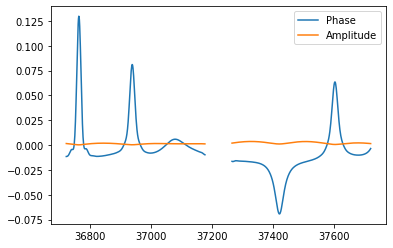

In [ ]:
y = defects.get_no_defectos()[1][indx_defects[3]-500:indx_defects[3]+500]

plt.plot(y['Gradient Phase'], label = 'Phase')
plt.plot(y['Amplitude'], label = 'Amplitude')
plt.legend()
plt.show()

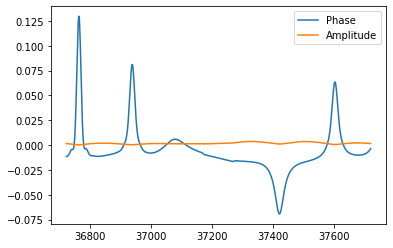

In [ ]:
x = y.copy()
x.interpolate(method='values', inplace=True, limit_direction='both')

plt.plot(x['Gradient Phase'], label = 'Phase')
plt.plot(x['Amplitude'], label = 'Amplitude')
plt.legend()
plt.show()